In [61]:
## 获取数据
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
data =  pd.read_table('F:/慧科教育/python课程/3.聚类-用户画像/k-means_data.txt',sep='\t',engine="python",encoding = 'gbk')
data.columns.values
data.head()

,用户id,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额
0,10023679,1028,1042,43,43.0,6,1289.0,3,3.0,1,1.0,33.0
1,100599330,5615,6786,295,314.0,34,21537.0,10,10.0,3,3.0,5907.0
2,100814485,436,436,58,58.0,2,719.0,1,1.0,0,NaN,NaN
3,100888089,37837,78600,2599,3642.0,307,146433.0,93,95.0,26,26.0,3528.0
4,10111279,5942,7448,323,345.0,35,12771.0,6,6.0,7,7.0,962.0


In [62]:
data = data.drop(['用户id'],axis=1)

In [63]:
# 缺失值处理 -- 每列特征的均值填充缺失数据
data = data.fillna(data.mean())

In [64]:
#缺失值处理之后，索引恢复
for i in [data]:
    i.index = range(i.shape[0])
data.head()

,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额
0,1028,1042,43,43.0,6,1289.0,3,3.0,1,1.000000,33.000000
1,5615,6786,295,314.0,34,21537.0,10,10.0,3,3.000000,5907.000000
2,436,436,58,58.0,2,719.0,1,1.0,0,70.704698,27505.932886
3,37837,78600,2599,3642.0,307,146433.0,93,95.0,26,26.000000,3528.000000
4,5942,7448,323,345.0,35,12771.0,6,6.0,7,7.000000,962.000000


In [33]:
#查看缺失值
na_num = pd.isna(data).sum()
print(na_num)

浏览数量    0
浏览次数    0
观看数量    0
观看次数    0
短停次数    0
观看时长    0
关注数量    0
关注次数    0
购买数量    0
购买次数    0
消费金额    0
dtype: int64


In [41]:
# 更新列名
# data.rename(columns={'age':'income_30', 'c210apvt':'share_30'....}, inplace = True)
# data.head()

 标准化计算方式：(x-平均值)/方差，得到均值为0，标准差为1的分布，
 标准化之后的内容是数组型，需要转化为数据框

In [65]:
# 通过手动计算进行标准化
x = (data -data.mean())/data.std()
print(x.mean(),x.std())

浏览数量   -4.574530e-17
浏览次数    5.037123e-17
观看数量    4.908625e-17
观看次数    8.892064e-17
短停次数   -3.340949e-18
观看时长   -1.233581e-17
关注数量    2.312965e-17
关注次数   -3.181760e-16
购买数量   -5.936609e-17
购买次数   -1.125441e-16
消费金额    1.852633e-16
dtype: float64 浏览数量    1.0
浏览次数    1.0
观看数量    1.0
观看次数    1.0
短停次数    1.0
观看时长    1.0
关注数量    1.0
关注次数    1.0
购买数量    1.0
购买次数    1.0
消费金额    1.0
dtype: float64


In [71]:
x.head()

,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额
0,-0.518910,-0.327907,-0.424000,-0.346839,-0.369666,-0.363680,-0.352315,-0.456824,-0.362473,-5.231531e-01,-4.066163e-01
1,-0.418679,-0.310032,-0.376968,-0.330061,-0.341173,-0.331217,-0.331253,-0.440259,-0.345799,-5.081425e-01,-3.196775e-01
2,-0.531845,-0.329792,-0.421201,-0.345910,-0.373737,-0.364594,-0.358332,-0.461557,-0.370811,-1.066564e-16,2.153773e-16
3,0.285400,-0.086562,0.053037,-0.124014,-0.063361,-0.130970,-0.081518,-0.239120,-0.154044,-3.355212e-01,-3.548882e-01
4,-0.411534,-0.307972,-0.371743,-0.328141,-0.340155,-0.345271,-0.343288,-0.449725,-0.312450,-4.781214e-01,-3.928666e-01


In [70]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
data_s = pd.DataFrame(scaler.fit_transform(data,y=data.columns)) 
data_s.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.520115,-0.328668,-0.424985,-0.347645,-0.370525,-0.364525,-0.353133,-0.457885,-0.363315,-0.524368,-4.075608e-01
1,-0.419652,-0.310753,-0.377844,-0.330827,-0.341965,-0.331986,-0.332022,-0.441282,-0.346602,-0.509323,-3.204201e-01
2,-0.533081,-0.330558,-0.422179,-0.346714,-0.374605,-0.365441,-0.359165,-0.462629,-0.371672,0.000000,-5.396940e-17
3,0.286063,-0.086763,0.053160,-0.124302,-0.063508,-0.131274,-0.081707,-0.239675,-0.154402,-0.336301,-3.557125e-01
4,-0.412490,-0.308688,-0.372606,-0.328903,-0.340945,-0.346073,-0.344086,-0.450769,-0.313176,-0.479232,-3.937791e-01


In [35]:
print(data_s.mean(),data_s.std())

0    -3.495147e-17
1    -1.490577e-17
2     3.829241e-17
3     1.027984e-18
4    -4.728728e-17
5    -1.850372e-17
6     1.850372e-17
7    -5.139921e-18
8    -1.876071e-17
9    -1.413478e-17
10   -6.604085e-17
dtype: float64 0     1.002323
1     1.002323
2     1.002323
3     1.002323
4     1.002323
5     1.002323
6     1.002323
7     1.002323
8     1.002323
9     1.002323
10    1.002323
dtype: float64


In [76]:
new_col = data.columns
data_s.columns = new_col
data_s.head()

,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额
0,-0.520115,-0.328668,-0.424985,-0.347645,-0.370525,-0.364525,-0.353133,-0.457885,-0.363315,-0.524368,-4.075608e-01
1,-0.419652,-0.310753,-0.377844,-0.330827,-0.341965,-0.331986,-0.332022,-0.441282,-0.346602,-0.509323,-3.204201e-01
2,-0.533081,-0.330558,-0.422179,-0.346714,-0.374605,-0.365441,-0.359165,-0.462629,-0.371672,0.000000,-5.396940e-17
3,0.286063,-0.086763,0.053160,-0.124302,-0.063508,-0.131274,-0.081707,-0.239675,-0.154402,-0.336301,-3.557125e-01
4,-0.412490,-0.308688,-0.372606,-0.328903,-0.340945,-0.346073,-0.344086,-0.450769,-0.313176,-0.479232,-3.937791e-01


In [6]:
data_s.shape

(5951, 11)

In [48]:
#查看缺失值
na_num = pd.isna(data).sum()
print(na_num)

age         0
c210apvt    0
c210b200    0
c210blu     0
c210bpvt    0
c210cip     0
c210ebi     0
c210hmi     0
c210hva     0
c210kses    0
c210mah     0
c210mob     0
c210mys     0
c210pdv     0
c210pmr     0
c210poo     0
c210psu     0
c210pwc     0
c210wht     0
ilor        0
meda        0
pdpe        0
tins        0
zhip19      0
dtype: int64


In [173]:
# 缺失值处理，直接删除
data.dropna()

,用户id,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额
0,10023679,1028,1042,43,43.0,6,1289.0,3,3.0,1,1.0,33.0
1,100599330,5615,6786,295,314.0,34,21537.0,10,10.0,3,3.0,5907.0
3,100888089,37837,78600,2599,3642.0,307,146433.0,93,95.0,26,26.0,3528.0
4,10111279,5942,7448,323,345.0,35,12771.0,6,6.0,7,7.0,962.0
6,10122020,6916,9220,310,336.0,18,12108.0,12,12.0,4,4.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,20447101,2816,3043,85,85.0,8,5800.0,1,1.0,1,1.0,15.0
211,206321527,4925,5993,235,245.0,21,5080.0,4,4.0,3,3.0,13.0
212,207265912,35786,72931,2676,3650.0,303,141864.0,76,80.0,28,29.0,1481.0
213,207285840,15293,21865,748,846.0,112,34709.0,26,27.0,8,8.0,400.0


In [174]:
# 缺失值处理 -- 某一列删除
data1 = data.drop(['用户id'],axis=1).dropna()

In [175]:
#缺失值处理之后，索引恢复
for i in [data1]:
    i.index = range(i.shape[0])
data1.head()

,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额
0,1028,1042,43,43.0,6,1289.0,3,3.0,1,1.0,33.0
1,5615,6786,295,314.0,34,21537.0,10,10.0,3,3.0,5907.0
2,37837,78600,2599,3642.0,307,146433.0,93,95.0,26,26.0,3528.0
3,5942,7448,323,345.0,35,12771.0,6,6.0,7,7.0,962.0
4,6916,9220,310,336.0,18,12108.0,12,12.0,4,4.0,31.0


In [176]:
na_num1 = pd.isna(data1).sum()
print(na_num1)

浏览数量    0
浏览次数    0
观看数量    0
观看次数    0
短停次数    0
观看时长    0
关注数量    0
关注次数    0
购买数量    0
购买次数    0
消费金额    0
dtype: int64


In [49]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 24 columns):
age         43666 non-null float64
c210apvt    43666 non-null float64
c210b200    43666 non-null float64
c210blu     43666 non-null float64
c210bpvt    43666 non-null float64
c210cip     43666 non-null float64
c210ebi     43666 non-null float64
c210hmi     43666 non-null float64
c210hva     43666 non-null float64
c210kses    43666 non-null float64
c210mah     43666 non-null float64
c210mob     43666 non-null float64
c210mys     43666 non-null float64
c210pdv     43666 non-null float64
c210pmr     43666 non-null float64
c210poo     43666 non-null float64
c210psu     43666 non-null float64
c210pwc     43666 non-null float64
c210wht     43666 non-null float64
ilor        43666 non-null float64
meda        43666 non-null float64
pdpe        43666 non-null float64
tins        43666 non-null float64
zhip19      43666 non-null float64
dtypes: float64(24)
memory usage: 8.0 MB


In [75]:
#索引恢复
for i in [data_s]:
    i.index = range(i.shape[0])
data_s.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.520115,-0.328668,-0.424985,-0.347645,-0.370525,-0.364525,-0.353133,-0.457885,-0.363315,-0.524368,-4.075608e-01
1,-0.419652,-0.310753,-0.377844,-0.330827,-0.341965,-0.331986,-0.332022,-0.441282,-0.346602,-0.509323,-3.204201e-01
2,-0.533081,-0.330558,-0.422179,-0.346714,-0.374605,-0.365441,-0.359165,-0.462629,-0.371672,0.000000,-5.396940e-17
3,0.286063,-0.086763,0.053160,-0.124302,-0.063508,-0.131274,-0.081707,-0.239675,-0.154402,-0.336301,-3.557125e-01
4,-0.412490,-0.308688,-0.372606,-0.328903,-0.340945,-0.346073,-0.344086,-0.450769,-0.313176,-0.479232,-3.937791e-01


In [19]:
# 缺失值处理 -- 每列特征的均值填充缺失数据
data2 = data.fillna(data.mean())

In [ ]:
### 用每列特征的中位数填充缺失数据
data.fillna(data.median())

In [ ]:
#用相邻后面（back）特征填充前面空值，前一个则是ffill
data.fillna(method='bfill')   

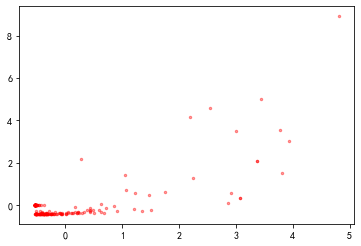

In [77]:
# 查看元数据散点图
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(data_s['浏览数量'],data_s['消费金额'], s=6, c='r', 
            alpha=0.4, label='散点1')
plt.show()

In [56]:
# # 查看元数据条形图
# plt.bar(data['age'],data['c210b200'],width = 6,facecolor = 'lightskyblue',
#         edgecolor = 'blue')

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

最佳K值的确定：
肘部法：选择误差平方和突然变小的K值
轮廓系数：轮廓系数的值是介于[-1,1] ，越趋近于1代表内聚度和分离度都相对较优
Calinski-Harabasz分数值ss越大则聚类效果越好

Text(0, 0.5, '$J(C_K)$')

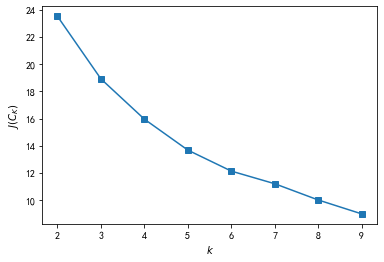

In [78]:
#  确定K值
inertia = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k,random_state = 1).fit(data_s)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2,10),inertia,marker = 's')
plt.xlabel('$k$') #k值
plt.ylabel('$J(C_K)$')#误差平方和
#4和5

In [40]:
# 轮廓系数
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

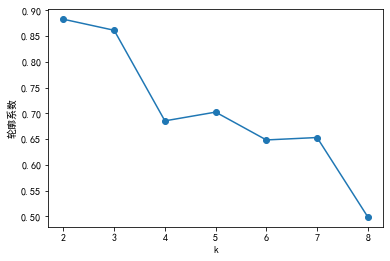

In [41]:
# 存放轮廓系数
Scores = []  
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()

calinski_harabaz_score：卡林斯基-哈拉巴斯指数

In [43]:
# # calinski_harabaz指数
# from sklearn.metrics import calinski_harabaz_score
# import matplotlib.pyplot as plt
# haraba = []  
# plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# for k in range(2, 9):
#     estimator = KMeans(n_clusters=k)  # 构造聚类器
#     estimator.fit(data_s)
#     haraba.append(calinski_harabaz_score(data_s,estimator.labels_))
# X = range(2, 9)
# plt.xlabel('k')
# plt.ylabel('calinski_harabaz指数')
# plt.plot(X, haraba, 'o-')
# plt.show()

In [44]:
# 建立模型
cluster = KMeans(n_clusters = 3,random_state = 5).fit(data_s)

In [45]:
# 聚类中心
centers = cluster.cluster_centers_ # 聚类中心
centers

array([[-0.24086771, -0.23612875, -0.24679506, -0.23750778, -0.24407186,
        -0.23998892, -0.24588303, -0.23761245, -0.2481949 , -0.24021886,
        -0.2038679 ],
       [ 4.18746106,  5.87202123,  4.98944126,  6.04272195,  5.40499151,
         5.91156478,  5.56898052,  5.89075841,  5.20770096,  5.40352807,
         4.46732264],
       [ 2.98766891,  2.48715129,  2.88645693,  2.46757489,  2.73695579,
         2.54192316,  2.72629563,  2.50731885,  2.85533931,  2.67278393,
         2.29795669]])

In [80]:
# 样本聚类标签
# c_preds = cluster.labels_ # 不需要调用接口
c_preds1 = cluster.fit_predict(data_s) #也可以使用predict来进行
# print(c_preds)
print(c_preds1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 2
 2 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [81]:
# 查看总距离平方和 
inertia = cluster.inertia_
inertia 

358.061277603538

In [82]:
# 轮廓系数均值
silhouette_score(data_s,c_preds) 

0.8613999860923777

In [83]:
#每个样本的轮廓系数
silhouette_samples(data_s,c_preds)

array([ 0.92732185,  0.93211408,  0.91754354,  0.88674901,  0.93250814,
        0.91832453,  0.93225057,  0.91800177,  0.91801442,  0.91371574,
        0.93039028,  0.92780645,  0.9175957 ,  0.91805761,  0.91801695,
        0.90394838,  0.82497174,  0.91733802,  0.86933501,  0.92838568,
        0.90395603,  0.90396898,  0.71949046,  0.60180808,  0.91797249,
        0.90003841,  0.8249717 ,  0.91807368,  0.93202087,  0.9181117 ,
        0.93245682,  0.92778811,  0.92656082,  0.72477047,  0.93019856,
        0.92828162,  0.91816004,  0.88759818,  0.93127829,  0.92603308,
        0.90071358, -0.17466512,  0.93172762,  0.91827221,  0.8707087 ,
        0.93098797,  0.93098797,  0.93137879,  0.93064253,  0.90396551,
        0.91799883,  0.93294867,  0.93255235,  0.92731491,  0.91761448,
        0.91798014,  0.93159375,  0.91974077,  0.91644496,  0.85981065,
        0.90395365,  0.91817525,  0.9318612 ,  0.90394838,  0.91843222,
        0.61614305,  0.93230046,  0.93227226,  0.93062299,  0.91

In [50]:
n_clusters =3

In [51]:
data_s.values[c_preds == 1] # 转化成数组

array([[3.93997978, 5.01148096, 3.97821543, 4.37202733, 3.994007  ,
        4.70353183, 4.24301416, 4.34747671, 4.45004274, 4.44062104,
        3.00214427],
       [3.8177029 , 4.07259406, 5.43397656, 6.10173802, 6.28388187,
        5.79352188, 5.81728506, 5.85122763, 4.39154707, 4.30521224,
        1.49642186],
       [4.8047005 , 8.53198868, 5.5561318 , 7.65440051, 5.93708567,
        7.23764063, 6.64664234, 7.47357088, 6.78151307, 7.46475092,
        8.90340178]])

In [52]:
centers[:,0]

array([-0.24086771,  4.18746106,  2.98766891])

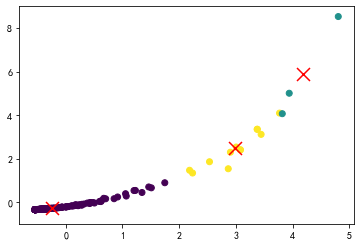

In [53]:
import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(data_s.values[:, 0], data_s.values[:, 1], c=c_preds)#原始数据散点图，按照分类查看
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)#重心红色X进行突出

In [ ]:
# 存放互信息量，当真实标签已经知道，可以用来判断聚类效果
# from sklearn import metrics
# mutual.append(adjusted_mutual_info_score(真实标签, estimator.labels_)
# mutual

In [54]:
# 将聚类后的值于原数据进行对比
from pandas.core.frame import DataFrame
c_preds = DataFrame(c_preds)
c_preds

,0
0,0
1,0
2,0
3,0
4,0
...,...
211,0
212,0
213,0
214,0


In [55]:
c_preds.rename(columns={0:'标签'},inplace=True)
c_preds

,标签
0,0
1,0
2,0
3,0
4,0
...,...
211,0
212,0
213,0
214,0


In [56]:
dataju = pd.concat([data,c_preds],axis=1 )
dataju.head()

,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额,标签
0,1028,1042,43,43.0,6,1289.0,3,3.0,1,1.000000,33.000000,0
1,5615,6786,295,314.0,34,21537.0,10,10.0,3,3.000000,5907.000000,0
2,436,436,58,58.0,2,719.0,1,1.0,0,70.704698,27505.932886,0
3,37837,78600,2599,3642.0,307,146433.0,93,95.0,26,26.000000,3528.000000,0
4,5942,7448,323,345.0,35,12771.0,6,6.0,7,7.000000,962.000000,0


In [57]:
# 导出为文件
import csv
outputpath='C:/Users/dell/Desktop/julei.csv'
dataju.to_csv(outputpath,index=True,header=True)

In [58]:
dataju[dataju.标签 == 0]

,浏览数量,浏览次数,观看数量,观看次数,短停次数,观看时长,关注数量,关注次数,购买数量,购买次数,消费金额,标签
0,1028,1042,43,43.0,6,1289.0,3,3.00,1,1.000000,33.000000,0
1,5615,6786,295,314.0,34,21537.0,10,10.00,3,3.000000,5907.000000,0
2,436,436,58,58.0,2,719.0,1,1.00,0,70.704698,27505.932886,0
3,37837,78600,2599,3642.0,307,146433.0,93,95.00,26,26.000000,3528.000000,0
4,5942,7448,323,345.0,35,12771.0,6,6.00,7,7.000000,962.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
211,4925,5993,235,245.0,21,5080.0,4,4.00,3,3.000000,13.000000,0
212,35786,72931,2676,3650.0,303,141864.0,76,80.00,28,29.000000,1481.000000,0
213,15293,21865,748,846.0,112,34709.0,26,27.00,8,8.000000,400.000000,0
214,20223,32222,1422,1744.0,134,62254.0,41,42.00,15,15.000000,1032.000000,0


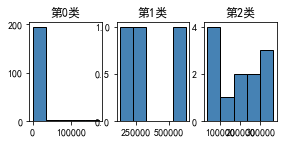

In [59]:
# 绘制子图
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = dataju[dataju.标签==i].消费金额, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

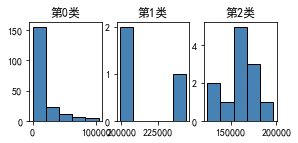

In [60]:
# 绘制子图
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(241+i)
    plt.hist(x = dataju[dataju.标签==i].浏览数量, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    ax.set_title('第'+str(i)+'类')
plt.show()

AGNES，是一种采用自底向上聚合策略的层次聚类算法，是先将数据集中的每个样本看作一个初始聚类簇，然后在算法运行的每一步中找出距离最近的两个聚类簇进行合并，该过程不断重复，直至达到预设的聚类簇个数，这里的关键是如何计算聚类簇之间的距离。其实每个聚类簇就是一个样本集合，聚类簇之间的聚类就是集合之间的聚类。


class sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=<function mean>)
    ### n_clusters：一个整数，指定分类簇的数量
    connectivity：一个数组或者可调用对象或者None，用于指定连接矩阵
    affinity：一个字符串或者可调用对象，用于计算距离。可以为：’euclidean’，’l1’，’l2’，’mantattan’，’cosine’，’precomputed’，如果linkage=’ward’，则affinity必须为’euclidean’
    memory：用于缓存输出的结果，默认为不缓存
    n_components：在 v-0.18中移除
    compute_full_tree：通常当训练了n_clusters后，训练过程就会停止，但是如果compute_full_tree=True，则会继续训练从而生成一颗完整的树
    linkage：一个字符串，用于指定链接算法 
        ‘ward’：单链接single-linkage，采用dmindmin
        ‘complete’：全链接complete-linkage算法，采用dmaxdmax
        ‘average’：均连接average-linkage算法，采用davgdavg
    pooling_func：一个可调用对象，它的输入是一组特征的值，输出是一个数

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
res = clustering.fit(data_s)